In [4]:
import requests
import os
import numpy as np
import pandas as pd

%matplotlib inline

In [5]:
stock_df = pd.read_csv("Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)['Close']
stock_df = stock_df.sort_index()
stock_df.tail()

Date
2021-03-12    0.024
2021-03-15    0.023
2021-03-16    0.021
2021-03-17    0.021
2021-03-18    0.021
Name: Close, dtype: float64

In [6]:
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

Date
2020-01-03    0.250000
2020-01-06    0.200000
2020-01-07    0.166667
2020-01-08    0.000000
2020-01-09    0.000000
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

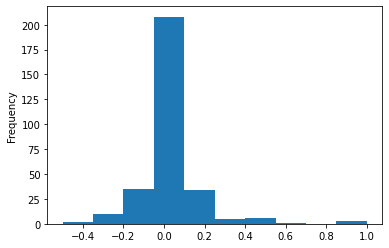

In [7]:
returns.plot(kind="hist")

In [8]:
mean = returns.mean()
std = returns.std()
(mean, std)

(0.018400556593291675, 0.1726121158347477)

In [9]:
from random import gauss
gauss(mean, std)

0.1052699205422502

In [10]:
last_val = stock_df.iloc[-1]
last_val

0.020999999716877937

In [11]:
last_val * (1+gauss(mean,std))

0.020132210188490055

In [12]:
simvals = [last_val]
days = 15
for day in range(days):
    newval = simvals[:]

In [13]:
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        

    return simvals

In [14]:
simulate_stocks(30,last_val)

[0.020999999716877937,
 0.020536013180227495,
 0.016981466322555865,
 0.013240403506342665,
 0.01609288977727337,
 0.013339006158727237,
 0.013740655288608931,
 0.015998462297970476,
 0.013993232671493333,
 0.013135495650578288,
 0.014501814908467641,
 0.01297813572279746,
 0.014451695710031824,
 0.015316632303372891,
 0.013377391542124183,
 0.014972086550212028,
 0.008673770765289688,
 0.011232380080323123,
 0.010979563444862547,
 0.009262104312806198,
 0.00998406846903959,
 0.013028402796344249,
 0.010409083567296138,
 0.010834041078420375,
 0.00954557721982754,
 0.009803345126714836,
 0.007167545812421833,
 0.006003804120555087,
 0.005387404009707723,
 0.004927616884309924,
 0.004661703107864189]

In [15]:
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [16]:
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.021,0.022241,0.028187,0.023144,0.015612,0.016000,0.015065,0.014583,0.019491,0.021222,0.025359,0.017645,0.012981,0.018394,0.021513,0.023992
1,0.021,0.023694,0.024926,0.022755,0.020531,0.023945,0.024788,0.023212,0.026462,0.029513,0.026885,0.018252,0.016902,0.020610,0.015863,0.016755
2,0.021,0.022737,0.020771,0.018504,0.017926,0.019744,0.020386,0.015960,0.015426,0.015084,0.016625,0.013991,0.017145,0.017104,0.016461,0.011985
3,0.021,0.015921,0.020038,0.025020,0.023268,0.024791,0.018801,0.024367,0.021952,0.029137,0.020159,0.021889,0.017229,0.021646,0.014185,0.013200
4,0.021,0.022007,0.022816,0.017070,0.016994,0.014113,0.013126,0.008158,0.009621,0.013384,0.011905,0.011345,0.009561,0.007770,0.007605,0.010836


In [17]:
results_df = pd.DataFrame(results).T
results_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,...,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000
1,0.022241,0.023694,0.022737,0.015921,0.022007,0.019017,0.026577,0.024620,0.020029,0.023629,...,0.024205,0.022165,0.017176,0.022406,0.021319,0.019221,0.020510,0.016118,0.022640,0.019550
2,0.028187,0.024926,0.020771,0.020038,0.022816,0.021215,0.023625,0.022946,0.021170,0.025693,...,0.027076,0.016947,0.014013,0.023960,0.025019,0.019428,0.023682,0.016758,0.016937,0.022932
3,0.023144,0.022755,0.018504,0.025020,0.017070,0.019003,0.017534,0.027015,0.020387,0.020606,...,0.024440,0.014651,0.009448,0.024715,0.027270,0.021219,0.033489,0.020889,0.014454,0.016151
4,0.015612,0.020531,0.017926,0.023268,0.016994,0.019179,0.015312,0.026106,0.021711,0.018167,...,0.023450,0.011086,0.010081,0.021835,0.026825,0.016626,0.044239,0.021003,0.016552,0.020409


<AxesSubplot:>

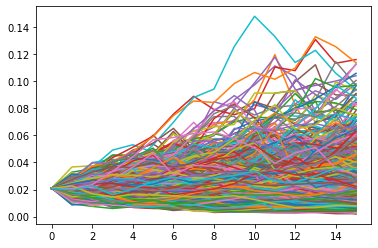

In [18]:
results_df.plot(legend=False)

In [19]:
end_values = results_df.iloc[-1]
end_values.head()

0    0.023992
1    0.016755
2    0.011985
3    0.013200
4    0.010836
Name: 15, dtype: float64

<AxesSubplot:ylabel='Frequency'>

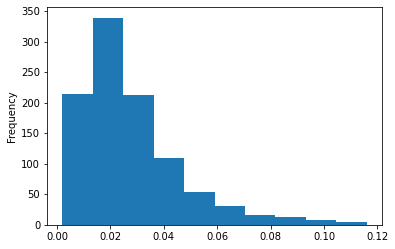

In [20]:
end_values.plot(kind="hist")

In [21]:
end_values.quantile([0.1,0.9])

0.1    0.009184
0.9    0.051614
Name: 15, dtype: float64

In [22]:
last_val

0.020999999716877937